UDP packet size for different channel counts (48kHz, 16bit, 128samples):


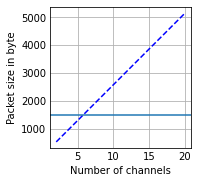

In [26]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('_mpl-gallery')

udp_header_size = 8
jacktrip_header_size = 12

bit_depths = [16, 24, 32]
sample_rates = [44100, 48000, 96000, 192000]
buffer_sizes = [16, 32, 64, 128, 256, 512, 1024]

def udp_packet_size(buffer_size: int, number_of_channels: int, bit_depth: int) -> int:
    return udp_header_size + jacktrip_header_size + (number_of_channels * buffer_size * bit_depth / 8)

arr_udp_packet_size = np.vectorize(udp_packet_size)

print("UDP packet size for different channel counts (48kHz, 16bit, 128samples):")
x = range(2, 21)
y = arr_udp_packet_size(buffer_size = 128, number_of_channels = x, bit_depth = 16)

# plot
fig, ax = plt.subplots()
ax.set(xlabel='Number of channels', ylabel='Packet size in byte')
ax.plot(x, y, 'b--')
plt.axhline(y=1500)

plt.show()


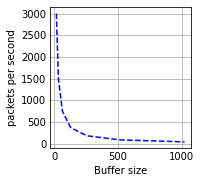

In [30]:
def packets_per_second(sample_rate: int, buffer_size: int) -> int:
    return sample_rate / buffer_size

arr_packets_per_second = np.vectorize(packets_per_second)

nr_packets = arr_packets_per_second(48000, buffer_sizes)
fig, ax = plt.subplots()
ax.set(xlabel='Buffer size', ylabel='packets per second')
ax.plot(buffer_sizes, nr_packets, 'b--')

plt.show()

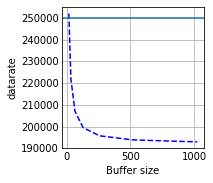

In [46]:
switch_buffer_size = 3000000 # 3Mbit in Bit
# Processing speed must be considered

def datarate(nr_packets: int, packet_size: int) -> int:
    return nr_packets * packet_size

arr_datarate = np.vectorize(datarate)

datarate = arr_datarate(nr_packets, arr_udp_packet_size(buffer_sizes, 2, 16))
fig, ax = plt.subplots()
ax.set(xlabel='Buffer size', ylabel='datarate')
ax.plot(buffer_sizes, datarate, 'b--')
plt.axhline(y=switch_buffer_size/8)

plt.show()

## Propagation Delay

D / S

In [ ]:
distance = 10
speed = 10

prop_delay = distance / speed


## Transmission Delay

L / B

* L - packet size
* B - link capacity

In [ ]:
packet_size = 1500
link_capacity = 1000000000

def transmission_delay(packet_size: int, link_capacity: int) -> int:
    return packet_size / link_capacity

arr_transmission_delay = np.vectorize(transmission_delay)

## Queueing Delay

Time a packet waits in the queue to be processed.

Wikipedia: "The average delay any given packet is likely to experience is given by the formula 1/(μ-λ) where μ is the number of packets per second the facility can sustain and λ is the average rate at which packets are arriving to be serviced."

## Processing Delay

Time a switch needs to process a packet.